# Quantum Teleportation Example (Classical Simulation)

This notebook displays an example of Quantum Teleportation, done on the quantum computer simulator.

Here's the premise: Alice and Bob are a far distance apart, but they each hold one half of an entangled Bell State. They also have a classical channel of communication (maybe like text messaging or a phone call). 

Alice has a state $|\psi \rangle$ that she would like to teleport to Bob. She can do so with two gate operations, a quick (classically communicated) phone call, and classical control gates.

Alice will apply a CNOT gate between the state $| \psi \rangle$ and her half of the Bell State. She will then apply a Hadamard gate to the state $| \psi \rangle$. Then, Alice will measure the two qubit in her possesion. They will return one of four combinations: 00, 01, 10, or 11. She quickly calls Bob and lets him know which of the four combinations she measured, and Bob will adjust his qubit accordingly. These correspond to classical control operations.

Let's mention a few physical things. Firstly, we may wonder why Alice applying the CNOT and Hadamanrd between her half of the Bell state and the state $| \psi \rangle$ seems to send the information contained in $| \psi \rangle$ to Bob. This is because the Bell State is entangled. By applying operations on her half of the Bell State, and by measuring it, she also affects Bob's qubit, the other half of the Bell State.

Also, we may notice that Alice no longer posses any qubit with the information of $| \psi \rangle$. After measurement, hre qubits have collapsed into classical bits, measuring only 0 or 1. This is why we call it quantum teleportation! Alice no longer has her state, but Bob does! This result follows from the No Cloning Theorem.


## Coding the Teleportation Example

Let's first start by importing the necessary packages. 


In [2]:
import numpy as np
import math as m
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
#from qiskit_textbook.tools import random_state, array_to_latex # This import isn't working for me

import qiskit
print(qiskit.__qiskit_version__) # I add this so we know what versions are being used

{'qiskit-terra': '0.14.1', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.0', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.1', 'qiskit': '0.19.3'}


## Preparing the Circuit

Next, we prepate our quantum and classical registries. Think of this as declaring how many qubits and classical bits we need. We then combine them all into one circuit. In this example, qubit 0 is $| \psi \langle$, qubit 1 is Alice's half of the Bell state, and qubit 2 is Bob's half of the Bell state. The first two classical registries, crz and crx, will be used for classical control operations. The final registry, result, is where we will measure Bob's final state.

In [14]:
# Next, we must prepare the quantum and classical registries, and create the circuit

qr = QuantumRegister(3) # Creating a quantum registr with 3 qubits
crz = ClassicalRegister(1) # creating one classical registry. Named CRZ since this is the one connected to Control-Z
crx = ClassicalRegister(1) # creating another classical registry. Named CRX because this is the one connected to Control-X
result = ClassicalRegister(1) # This is where the final measurement of Bob's Qubit will go

Tel_Circuit = QuantumCircuit(qr, crz, crx, result) #Creates the circuit: It has 3 qubits and 3 classical bits.

print("Done creating")

Done creating




This next cell prepares all the portions of the teleportation circuit. 

First, we prepare $| \psi \rangle$, the state we are teleporting. We then prepare the bell state between Alice and Bob. Next, we apply the CNOT and Hadamard on Alice's qubits. Finally, we take our measurements. (The corrections are done in the next cell.)

In [15]:
# It's possible to do this all with functions, but I'd perfer to directly apply the gates.

print("Prepare the state we are teleporting")
theta = 0.0
phi = 0.0
lam = 0.0

Tel_Circuit.u3(theta, phi, lam, 0) #The last value is the quantum registry we are applying the gate to

print("Bell State Preparation")
Tel_Circuit.h(1)
Tel_Circuit.cx(1,2)
print(Tel_Circuit.draw())


print("")

print("Preparing Alice's Qubits")
Tel_Circuit.barrier()
Tel_Circuit.cx(0,1)
Tel_Circuit.h(0)
print(Tel_Circuit.draw())


print("")

print("Measurement and Classical Message Sending")
Tel_Circuit.barrier()
Tel_Circuit.measure(0,0) #For measure, the first input is the quantum registry number, and the second is the classical
Tel_Circuit.measure(1,1)
print(Tel_Circuit.draw())

Prepare the state we are teleporting
Bell State Preparation
      ┌───────────┐     
q2_0: ┤ U3(0,0,0) ├─────
      └───┬───┬───┘     
q2_1: ────┤ H ├──────■──
          └───┘    ┌─┴─┐
q2_2: ─────────────┤ X ├
                   └───┘
c6_0: ══════════════════
                        
c7_0: ══════════════════
                        
c8_0: ══════════════════
                        

Preparing Alice's Qubits
      ┌───────────┐      ░      ┌───┐
q2_0: ┤ U3(0,0,0) ├──────░───■──┤ H ├
      └───┬───┬───┘      ░ ┌─┴─┐└───┘
q2_1: ────┤ H ├──────■───░─┤ X ├─────
          └───┘    ┌─┴─┐ ░ └───┘     
q2_2: ─────────────┤ X ├─░───────────
                   └───┘ ░           
c6_0: ═══════════════════════════════
                                     
c7_0: ═══════════════════════════════
                                     
c8_0: ═══════════════════════════════
                                     

Measurement and Classical Message Sending
      ┌───────────┐      ░      ┌───┐ ░ ┌─┐   
q2_0:

## Applying the Correction

Once we take our measurement of Alice's qubit and the sending qubit, we must apply a correction.

There are a few possibilities, depending on what we measure. 

If we measure 00, we do nothing.

If we measure 01, we apply an X gate.

If we measure 10, we apply a Z gate.

If we measure 11, we apply a Z and an X gate.


In [16]:
Tel_Circuit.barrier()
Tel_Circuit.x(2).c_if(crx, 1) 
Tel_Circuit.z(2).c_if(crz, 1)

Tel_Circuit.barrier()
Tel_Circuit.measure(2,2) # I add a measurement here to measure Bob's qubit

# the extension, .c_if(classical_registry, value) is used to apply classical control

print(Tel_Circuit.draw())

      ┌───────────┐      ░      ┌───┐ ░ ┌─┐    ░                ░    
q2_0: ┤ U3(0,0,0) ├──────░───■──┤ H ├─░─┤M├────░────────────────░────
      └───┬───┬───┘      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                ░    
q2_1: ────┤ H ├──────■───░─┤ X ├──────░──╫─┤M├─░────────────────░────
          └───┘    ┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐  ░ ┌─┐
q2_2: ─────────────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├──░─┤M├
                   └───┘ ░            ░  ║  ║  ░  └─┬─┘  └─┬─┘  ░ └╥┘
                                         ║  ║       │   ┌──┴──┐    ║ 
c6_0: ═══════════════════════════════════╩══╬═══════╪═══╡ = 1 ╞════╬═
                                            ║    ┌──┴──┐└─────┘    ║ 
c7_0: ══════════════════════════════════════╩════╡ = 1 ╞═══════════╬═
                                                 └─────┘           ║ 
c8_0: ═════════════════════════════════════════════════════════════╩═
                                                                     


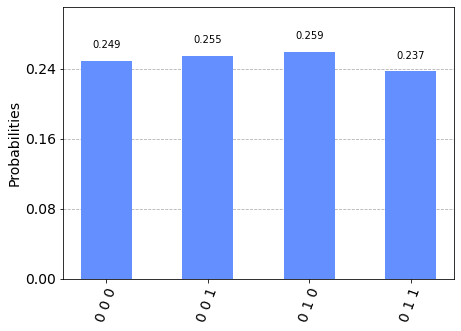

In [18]:
# Let's run the circuit

backend = BasicAer.get_backend('qasm_simulator') #'statevector_simulator' doesn't seem to return the right result
counts = execute(Tel_Circuit, backend, shots=1024).result().get_counts()
plot_histogram(counts)




## Conclusion

Note that the results are: 000, 001, 010, 011. It is best to read it as: 0(00), 0(01), 0(10), 0(11). The latter two numbers represent the two measurements Alice makes. Notice that when theta, lambda, and phi equals 0, the first measurement returns 0 every time. This means that Bob's qubit is returned as a 0, which is what we expect!

## References:

https://qiskit.org/textbook/ch-algorithms/teleportation.html
